# Question 8

#### a) Find the class priors using the training set. Report the prior probabilities of a pixel being ‘skin’ or being ‘non-skin’.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import glob
from PIL import Image
from io import BytesIO
import os.path

In [2]:
path = "./inputs/P8/pratheepan/"
number_of_pix = 0
white_class = 0
black_class = 0
for filename in glob.glob(path + 'train/set1/images/*.jpg'): #assuming gif
    im_name = os.path.basename(filename)[:-4]
    # print (im_name)
    im=Image.open(filename)
    ground_truth = Image.open(path + 'train/set1/groundtruth/'+im_name+".png")

    a = np.asarray(im)
    g = np.asarray(ground_truth)


    for i in range(0, len(g)):
        for j in range(0, len(g[0])):
            number_of_pix += 1
            if g[i][j][0] ==0:
                black_class +=1
            else:
                white_class +=1



In [5]:

white_prior = white_class/number_of_pix
black_prior = black_class/number_of_pix
print ("probability of white_class", white_prior)
print ("probability of Black class", black_prior)

probability of white_class 0.27737971103915027
probability of Black class 0.7226202889608497


#### b) If we decide to model the class-conditional probability density of each class using a univariate Gaussian, what would be the mean and variance of both class-conditional densities?

In [6]:
number_of_pix = 0
white_class = []
black_class = []
for filename in glob.glob(path + 'train/set1/images/*.jpg'): #assuming gif
    im_name = os.path.basename(filename)[:-4]
    # print (im_name)
    im=Image.open(filename)
    ground_truth = Image.open(path + 'train/set1/groundtruth/'+im_name+".png")

    a = np.asarray(im)
    g = np.asarray(ground_truth)


    for i in range(0, len(g)):
        for j in range(0, len(g[0])):
            number_of_pix += 1
            if g[i][j][0] ==0:
                black_class.append([a[i][j][0], a[i][j][1],a[i][j][2]])
            else:
                white_class.append([a[i][j][0], a[i][j][1],a[i][j][2]])


In [7]:
white_class= np.asarray(white_class)
black_class= np.asarray(black_class)

In [29]:
white_average = np.average(white_class, axis=0).reshape(-1,1)
print ("For Skin class \n -------------")
print ("Mean\n", white_average)
print ("-------------")
# normalized_white_class = white_class - average
# normalized_white_class_vectors = normalized_white_class.reshape(-1,1)
print ("Covariance Matrix")
white_cov = np.cov(white_class.T)
print (white_cov)

For Skin class 
 -------------
Mean
 [[190.49728975]
 [140.99640091]
 [112.06415329]]
-------------
Covariance Matrix
[[1938.29686227 1930.01997348 1845.39526753]
 [1930.01997348 2366.6346144  2441.33298208]
 [1845.39526753 2441.33298208 2676.98597279]]


In [34]:
black_average = np.average(black_class, axis=0).reshape(-1,1)
print ("For Non_Skin class \n -------------")
print ("Mean\n", black_average)
print ("-------------")
# normalized_white_class = white_class - average
# normalized_white_class_vectors = normalized_white_class.reshape(-1,1)
print ("Covariance Matrix")
black_cov = np.cov(black_class.T)

print (black_cov)

For Non_Skin class 
 -------------
Mean
 [[128.633646  ]
 [105.51495792]
 [ 95.05248156]]
-------------
Covariance Matrix
[[7822.84660232 6739.88356763 6287.91273555]
 [6739.88356763 7086.64480118 6897.54707591]
 [6287.91273555 6897.54707591 7098.99338834]]


#### c) Classify the pixels in image ‘mad_trump.jpg’ and ‘trump_long_tie.jpg’ (Figure 6) and display the results, i.e. the groundtruth image.

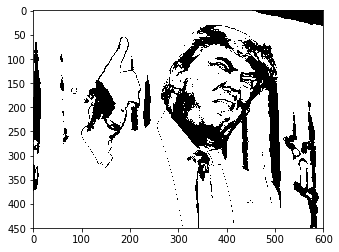

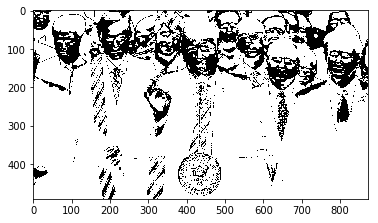

In [36]:
for address in ["./inputs/P8/mad_trump.jpg", "./inputs/P8/trump_long_tie.jpg"]:
    trump = Image.open(address)
    trump = np.asarray(trump)
    bias = 2 * np.log(black_prior/white_prior)
    output = np.zeros([len(trump), len(trump[0])])
    for i in range(0, len(trump)):
        for j in range(0, len(trump[0])):
            point = [trump[i][j][0], trump[i][j][1], trump[i][j][2]]
            point = np.asarray(point).reshape(-1,1)
            tmp1 = np.matmul((point-black_average).T, black_cov)
            tmp2 = np.matmul(tmp1, point-black_average)
            
            tmp3 = np.matmul((point-white_average).T, white_cov)
            tmp4 = np.matmul(tmp3, point-white_average)
            if tmp2 - tmp4 >= bias:
                output[i][j]=255
            else:
                output[i][j]=0
                
    plt.imshow(output, cmap='gray', vmin=0, vmax=255)
    plt.show()

#### d) Repeat the previous part with a MDC classifier. Display and compare the results.

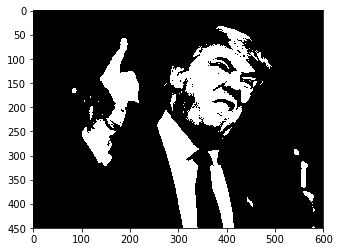

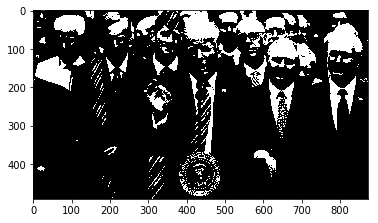

In [31]:
for address in ["./inputs/P8/mad_trump.jpg", "./inputs/P8/trump_long_tie.jpg"]:
    trump = Image.open(address)
    trump = np.asarray(trump)
    
    identity = np.identity(3, dtype = float)
    bias = 2 * np.log(black_prior/white_prior)
    output = np.zeros([len(trump), len(trump[0])])
    for i in range(0, len(trump)):
        for j in range(0, len(trump[0])):
            point = [trump[i][j][0], trump[i][j][1], trump[i][j][2]]
            point = np.asarray(point).reshape(-1,1)
            tmp1 = np.matmul((point-black_average).T, identity)
            tmp2 = np.matmul(tmp1, point-black_average)
    
            tmp3 = np.matmul((point-white_average).T, identity)
            tmp4 = np.matmul(tmp3, point-white_average)
            if tmp2 - tmp4 >= bias:
                output[i][j]=255
            else:
                output[i][j]=0
    
    plt.imshow(output, cmap='gray', vmin=0, vmax=255)
    plt.show()

#### e) Classify the pixels of the images in ‘test’ folder and report the overall test error.

In [39]:
def classify (point, mu_1, sigma_1, mu_2, sigma_2, bias): 
    tmp1 = np.matmul((point-mu_2).T, sigma_2)
    tmp2 = np.matmul(tmp1, point-mu_2)
    tmp3 = np.matmul((point-mu_1).T, sigma_1)
    tmp4 = np.matmul(tmp3, point-mu_1)
    if tmp2 - tmp4 >= bias:
        return 255
    else:
        return 0

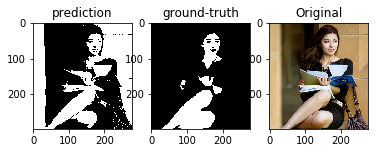

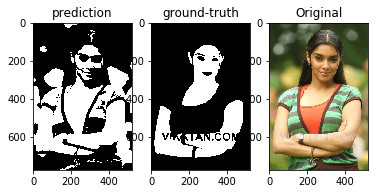

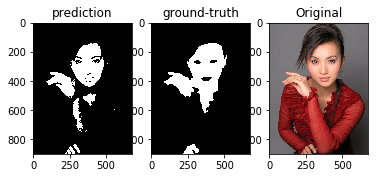

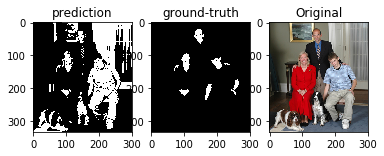

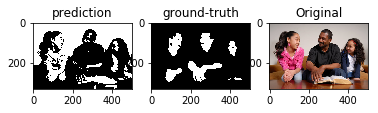

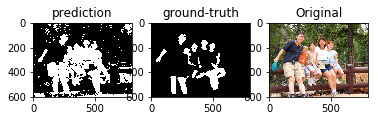

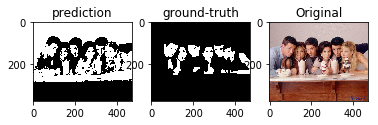

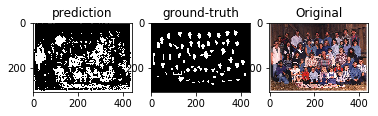

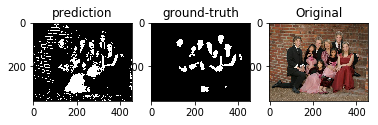

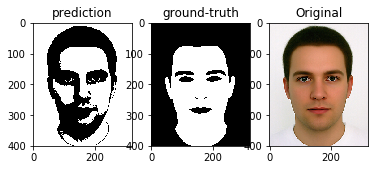

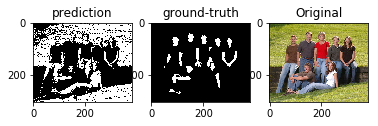

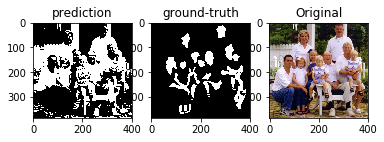

In [43]:
bias = 2 * np.log(black_prior/white_prior)
test_length = 0
tp = 0
tn = 0
fn = 0
fp = 0
identity = np.identity(3, dtype = float)
for filename in glob.glob(path + 'test/images/*.jpg'): #assuming gif
    im_name = os.path.basename(filename)[:-4]
    # print (im_name)
    im=Image.open(filename)
    ground_truth = Image.open(path + 'test/groundtruth/'+im_name+".png")

    a = np.asarray(im)
    g = np.asarray(ground_truth)

    prediction_array = np.zeros([len(g), len(g[0])])
    for i in range(0, len(g)):
        for j in range(0, len(g[0])):
            point = np.array([a[i][j][0],a[i][j][1], a[i][j][2]])
            point = point.reshape(-1,1)
            prediction = classify(point, white_average, identity, black_average, identity, bias)
            prediction_array[i][j] = prediction
            
            test_length += 1
            if g[i][j][0] ==0 and prediction==0:
                tn+=1
            elif not g[i][j][0] ==0 and prediction==0:
                fn+=1
            elif g[i][j][0] ==0 and not prediction==0:
                fp+=1
            elif not g[i][j][0] ==0 and not prediction==0:
                tp+=1
    plt.subplot(131).set_title('prediction')
   
    plt.imshow(prediction_array, cmap='gray', vmin=0, vmax=255)
    plt.subplot(132).set_title('ground-truth')
   
    plt.imshow(g, cmap='gray', vmin=0, vmax=255)
    plt.subplot(133).set_title('Original')
 
    plt.imshow(a)
    plt.show()



In [44]:
print ("error:", (tp+tn)/(tp+tn+fn+fp))

error: 0.7201934410495736


#### f) Compute a confusion matrix for this classifier.

In [46]:
print ("Confusion Matrix\n", np.array([[tn, fn],[fp, tp]]))

Confusion Matrix
 [[1657926  127615]
 [ 631550  296087]]


#### g) Calculate the Bayes error.

#### h) Draw a ROC curve to visualise the performance of the classification.

#### i) Repeat the previous parts, this time considering all training images (‘set1’ and ‘set2’). Compare the results.